IS362 Final Project: Analyzing data for the top 50 Spotify songs for the year 2019. 

Import modules:

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Import CSV data and convert to data frame

In [12]:
music = pd.read_csv('https://raw.githubusercontent.com/CoreyColgan/IS362_FinalProject/master/top50.csv', index_col=False)
spotify = pd.DataFrame(music)
spotify

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


Adjust column names to better reflect the data being analyzed

In [13]:
# delete "Unnamed" column - it is not needed
del spotify['Unnamed: 0']

# adjust column names respectively
spotify.rename(columns=
                {'Track.Name' : 'Track Name', 
                 'Artist.Name' : 'Artist',
                 'Beats.Per.Minute': 'BPM',
                 'Loudness..dB..':'Loudness dB',
                 'Valence.':'Valence',
                 'Length.' :'Length', 
                 'Acousticness..':'Acousticness',
                 'Speechiness.':'Speechiness',
                }, inplace=True)
spotify.head()

,Track Name,Artist,Genre,BPM,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


With the columns adjusted, now we will drop any unnecessary values from the data

In [14]:
spotify.dropna()

,Track Name,Artist,Genre,BPM,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


Analyze data for further details in regards to mean, standard deviation, and min/max values

In [16]:
attributes = spotify.describe()
attributes

,BPM,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


Now, we will create a graph to analyze the artists with the most songs in the top 50 spotify for year 2019

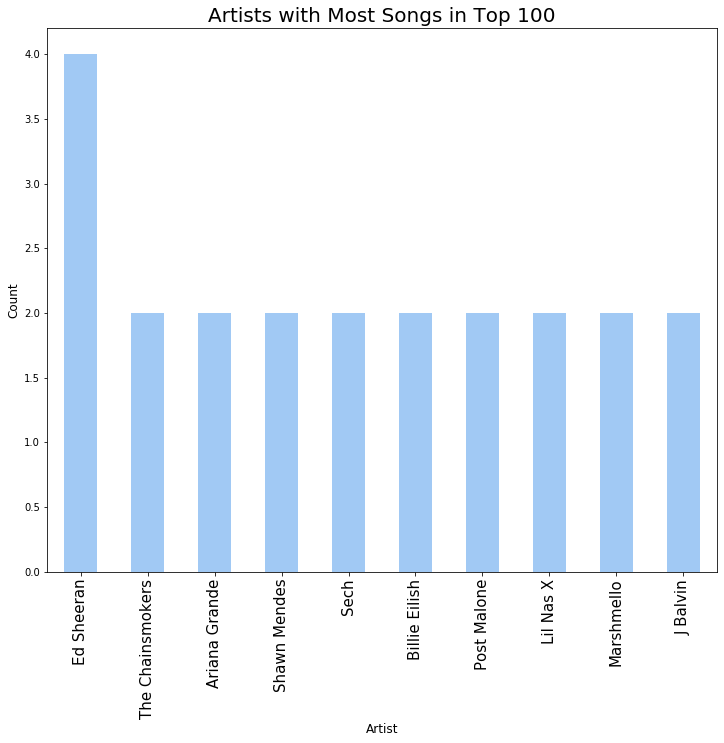

In [19]:
sns.set_palette('pastel')
plt.subplots(figsize=(12,10))
artist = spotify['Artist'].groupby(spotify['Artist']).count().sort_values(ascending=False)
plt.xlabel('Artist',size=12)
plt.xticks(size=15)
plt.ylabel('Count',size=12)
plt.title('Artists with Most Songs in Top 100',size=20)
artist.head(10).plot('bar')

Next, let's analyze the mean value for BPM of songs on the top 50 list

Mean value for BPM: 120.06


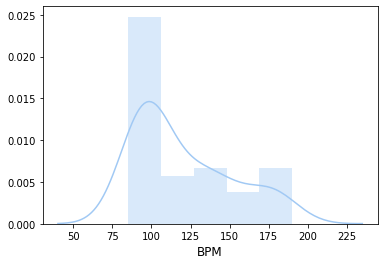

In [21]:
print('Mean value for BPM:', spotify['BPM'].mean())
sns.distplot(spotify['BPM'])
plt.xlabel('BPM',size=12)
plt.show()

Next, let's analyze the mean value for calculated energy of songs on the top 50 list

Mean value for Energy: 64.06


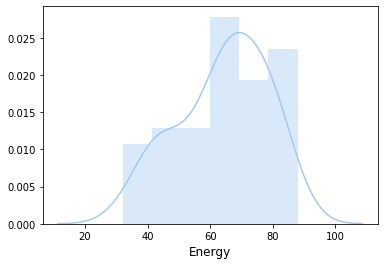

In [22]:
print('Mean value for Energy:', spotify['Energy'].mean())
sns.distplot(spotify['Energy'])
plt.xlabel('Energy',size=12)
plt.show()

Next, let's analyze the mean value for calculated danceability of songs on the top 50 list


Mean value for Danceability: 71.38


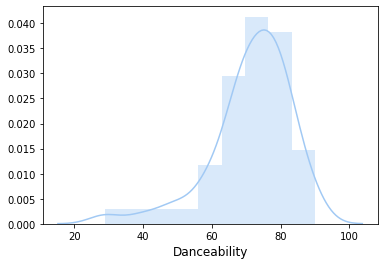

In [23]:
print('Mean value for Danceability:', spotify['Danceability'].mean())
sns.distplot(spotify['Danceability'])
plt.xlabel('Danceability',size=12)
plt.show()

Next, let's analyze the mean value for song length of songs on the top 50 list

Mean value for song Length: 200.96


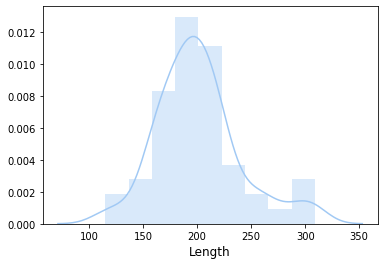

In [26]:
print('Mean value for song Length:', spotify['Length'].mean())
sns.distplot(spotify['Length'])
plt.xlabel('Length',size=12)
plt.show()

Lastly, we will combine these statistics into a single graph to compare how certain features may make certain
songs more popular than others

In [32]:
data= spotify.drop(['Speechiness', 'Acousticness', 'Valence'], axis=1)

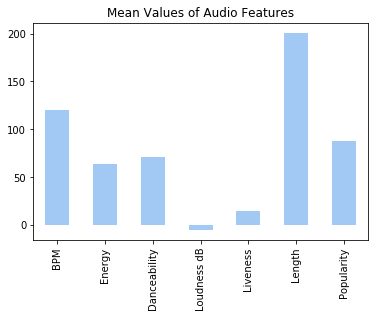

In [33]:
data.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

From the graph, we can summarize that most of the top songs streamed on spotify for year 2019 were at least 200 seconds
in length (~3 minutes long) and have a high BPM (faster pace) and danceability factors. This would lead me to believe 
many dance songs are the most popular for streaming on spotify. 